In [20]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats import iqr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [21]:
path = './'
df = pd.read_csv(path + "student_grades.csv")

In [22]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [23]:
df.shape

(104, 5)

In [24]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


### Using the example data above:

- Extract information from the results of .describe and compute IQR and range of each exam and the final grade

In [25]:
iqr(df.exam1,axis=0)

22.0

In [26]:
iqr(df.exam2,axis=0)

19.0

In [27]:
iqr(df.exam3,axis=0)

16.0

In [28]:
iqr(df.final_grade,axis=0)

21.0

In [35]:
df.exam1.max() - df.exam1.min()

43

In [36]:
df.exam2.max() - df.exam2.min()

28

In [37]:
df.exam3.max() - df.exam3.min()

26

In [38]:
df.final_grade.max() - df.final_grade.min()

32

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


In [94]:
print(df.isnull().sum())

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [97]:
# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


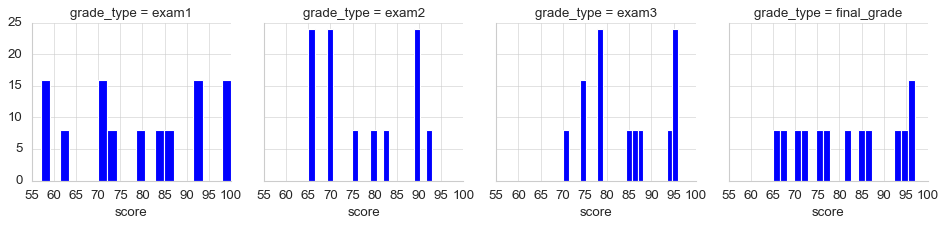

In [98]:
# Histogram
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20);

- Write a for loop to plot each of the 3 features (exam 1, 2, & 3) with the final grade using a joint plot. What can you say about each relationship (using pearson's r and the p-value)

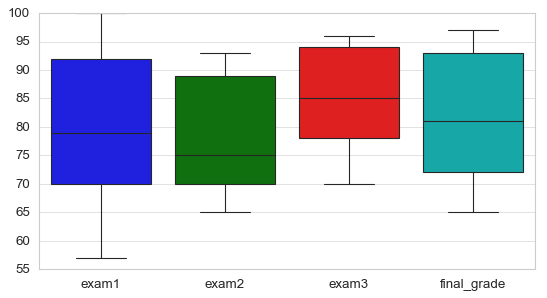

In [117]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

- Find a way to plot the boxplot & heatmap from section 6 side by side.

In [56]:
# test_train_split
X = df.drop(['final_grade','student_id'], axis=1)
y = df[['final_grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

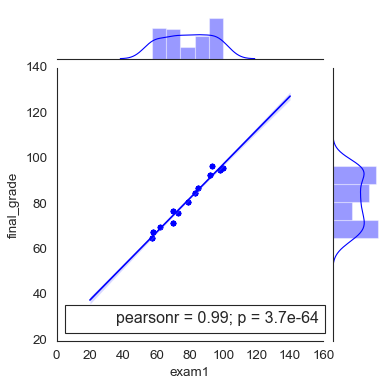

In [121]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

<Figure size 1280x800 with 0 Axes>

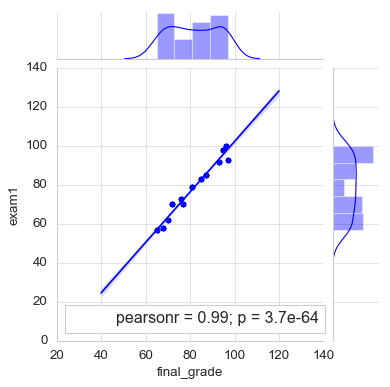

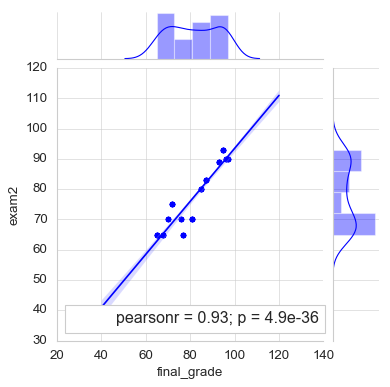

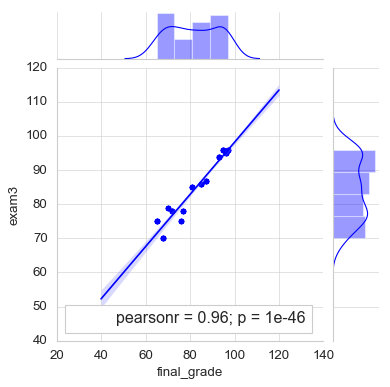

In [177]:
plt.figure(figsize=(16, 10))

for i in range(1,4):d
    j = sns.jointplot('final_grade', 'exam{}'.format(i), data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)

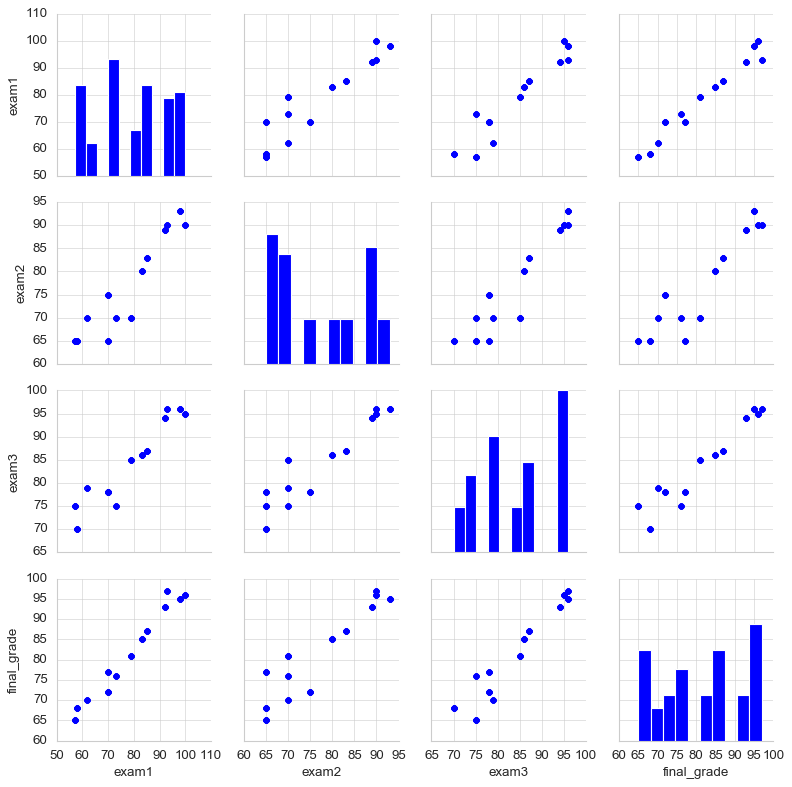

In [127]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

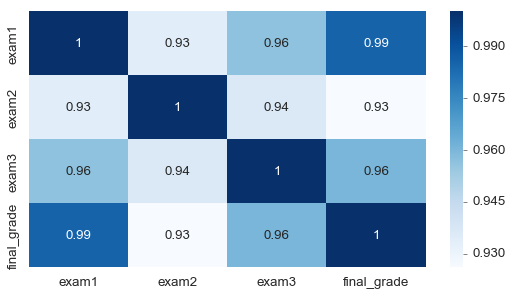

In [128]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

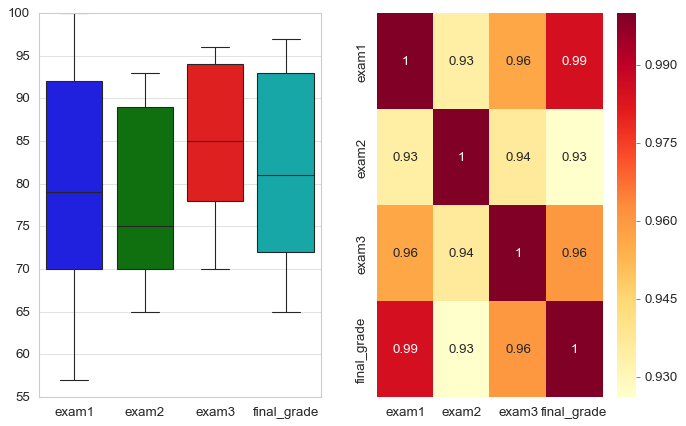

In [176]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

sns.boxplot(data=df.drop(columns=['student_id']), ax=ax[0])
sns.heatmap(train.corr(), ax=ax[1], annot=True, cmap='YlOrRd')

plt.show()